# Быстрые дескрипторы признаков
Исследуем работу алгоритмов BRIEF и ORB для задачи обнаружения ключевых точек для контуров ног на фотографии.

* Изображение: https://video.ittensive.com/machine-vision/feet.example.jpg

![SURF, BRIEF, ORB](surf-brief-orb.png)

### Подключение библиотек

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Загрузка изображения

In [2]:
image = cv2.imread("feet.example.jpg")

In [3]:
def show_image (img, gray=False):
    fig = plt.figure(figsize=(16,8))
    plt.axis("off")
    if gray:
        plt.imshow(img, cmap="Greys")
    else:
        plt.imshow(img[...,::-1])
    plt.show()

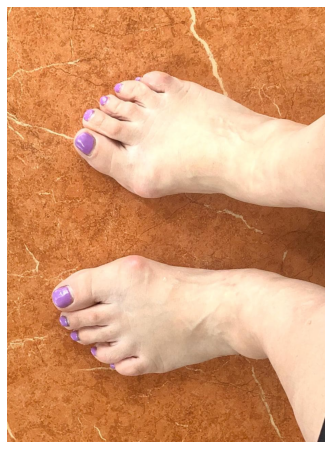

In [4]:
show_image(image)

### Фильтрация изображения

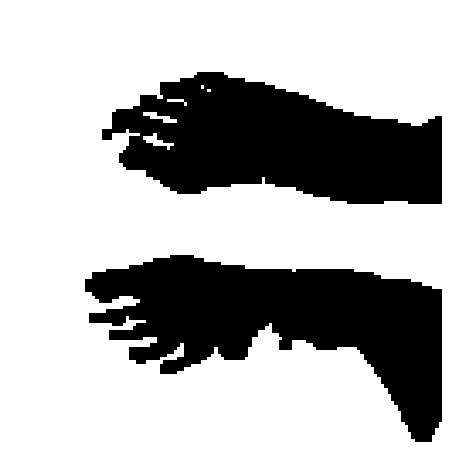

In [5]:
image_gray = cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), (128,128))
image_gray = cv2.morphologyEx(image_gray, cv2.MORPH_OPEN, np.ones((3,3)), iterations = 1)
otsu, image_thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
show_image(image_thresh, True)

### Детекторы ключевых точек
* SURF - вычисление нормированных градиентов для кандидатов в особые точки, отобранных по свертке
![SURF](surf.png)
* FAST - проверка яркости точки по пикселям на окружности радиуса 3 от исходной точки
![FAST](fast.jpg)
* BRIEF - данные сравнения 256 пар яркости точек в окрестности 31x31 от исходной точки
![BRIEF](brief.jpg)
* ORB=BRIEF+FAST, вычисляем точки по FAST, "поворачиваем" точки по моментам яркости до одной плокости, проверяем FAST точки по BRIEF
![ORB](orb.jpg)

In [6]:
fast = cv2.FastFeatureDetector_create()
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
orb = cv2.ORB_create()

In [7]:
kp1 = fast.detect(image_thresh, None)
kp1, des1 = brief.compute(image_thresh, kp1)
kp2, des2 = orb.detectAndCompute(image_thresh, None)

### Вывод результата

In [8]:
def draw_keypoints (img, kp, color, r):
    for i in range(len(kp)):
        xy = np.array(kp[i].pt)
        xy[0] *= img.shape[1]/128
        xy[1] *= img.shape[0]/128
        img = cv2.circle(img, tuple(np.round(xy).astype(np.uint32)), 5, color, r)
    return img

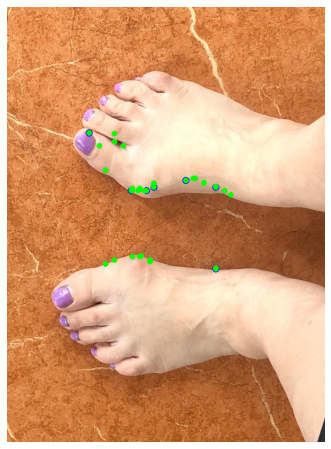

In [9]:
img = image.copy()
img = draw_keypoints(img, kp1, (255, 0, 0), 10)
img = draw_keypoints(img, kp2, (0, 255, 0), 5)
show_image(img)

### Сравнение с небинаризованным изображением

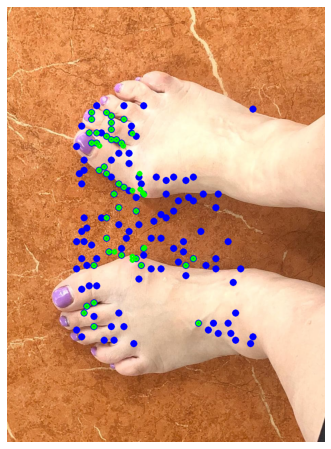

In [10]:
kp1 = fast.detect(image_gray, None)
kp1, des1 = brief.compute(image_gray, kp1)
kp2, des2 = orb.detectAndCompute(image_gray, None)
img = image.copy()
img = draw_keypoints(img, kp1, (255, 0, 0), 10)
img = draw_keypoints(img, kp2, (0, 255, 0), 5)
show_image(img)